In [ ]:
"""
identify LArTPC penetration depth for three particles
@aurthor Jiancheng Zeng
@Oct 29 2021
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd
import math
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [74]:
"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
#data = pd.read_table("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210824_anti_proton_250MeV_Lin.dat")    #get data file
data = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/rawdata/Old_GRASP_anti_He3_5e7_MeV.dat"))
print("finish reading data!")

"""
modification
"""
Particle_Type = -1000020030    #[antiproton]-2212    [antideuteron]-1000010020    [antiHe3]-1000020030
TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index_pbar = []
angle_pbar = []
distance_pbar = []
PeD_pbar = []
PeD_pbar_z = []
TOF_out_pbar_side = []
Nevent = -1

print("Modifing data ...")
for i in range(len(data[:,0])-1):
    TOF_out_p = 0
    TOF_in_p = 0
#for i in range(27):
    Nevent = Nevent + 1
    if(data[i][0] != data[i+1][0]):
        for k in range(Nevent):
            if(str(data[i-Nevent+k][6]) == 'LAr' and str(data[i-Nevent+k][3]) == str(Particle_Type) and str(data[i][8]) == str(data[i][9])):
                event_in = 0
                event_out = 0
                tempin = 0
                tempout = 0
                tempin_T = 0
                TOF_out_p = 0
                d_from_top = 0
                for m in range(k):
                    if(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10004' or str(data[i-Nevent+m][5]) == '-10005' and str(data[i-Nevent+m][3]) == str(Particle_Type)):
                    #if(str(data[i-Nevent+m][5]) == '-11004' and str(data[i-Nevent+m][3]) == str(Particle_Type)):
                        tempout = tempout + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-10000' and str(data[i-Nevent+m-1][5]) != '-10001' and str(data[i-Nevent+m-1][5]) != '-10002' and str(data[i-Nevent+m-1][5]) != '-10003' and str(data[i-Nevent+m-1][5]) != '-10004' and str(data[i-Nevent+m-1][5]) != '-10005' or str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10001' or str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10004' or str(data[i-Nevent+m][5]) == '-10005' and data[i-Nevent+m][6] == 'Plastic'):
                            tempout_T = data[i-Nevent+m][7]
                            event_out = m
                            if(str(data[i-Nevent+m][5]) == '-10002' or str(data[i-Nevent+m][5]) == '-10003' or str(data[i-Nevent+m][5]) == '-10004' or str(data[i-Nevent+m][5]) == '-10005'):
                                d_from_top = 170.0 - float(data[i-Nevent+m][18])
                    #elif(str(data[i-Nevent+m][5]) == '-10000' or str(data[i-Nevent+m][5]) == '-10005' and str(data[i-Nevent+m][3]) == str(Particle_Type)):
                    if(str(data[i-Nevent+m][5]) == '-11000' or str(data[i-Nevent+m][5]) == '-11001' or str(data[i-Nevent+m][5]) == '-11002' or str(data[i-Nevent+m][5]) == '-11003' or str(data[i-Nevent+m][5]) == '-11004' or str(data[i-Nevent+m][5]) == '-11005' and str(data[i-Nevent+m][3]) == str(Particle_Type)):
                        tempin = tempin + float(data[i-Nevent+m][9])
                        if(str(data[i-Nevent+m-1][5]) != '-11000' and str(data[i-Nevent+m-1][5]) != '-11001' and str(data[i-Nevent+m-1][5]) != '-11002' and str(data[i-Nevent+m-1][5]) != '-11003' and str(data[i-Nevent+m-1][5]) != '-11004' and str(data[i-Nevent+m-1][5]) != '-11005' and data[i-Nevent+m][6] == 'Plastic'):
                            tempin_T = data[i-Nevent+m][7]
                            event_in = m
                if(tempin != 0 and tempout != 0):
                    #theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-0) ** 2))
                    theta = np.arctan(np.sqrt((float(data[i-Nevent+event_out][17])-float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][16])-float(data[i-Nevent+event_in][16])) ** 2)/(float(data[i-Nevent+event_out][18])-float(data[i-Nevent+event_in][18])))
                    distance = np.sqrt((float(data[i-Nevent+event_out][16]) - float(data[i-Nevent+event_in][16])) ** 2 + (float(data[i-Nevent+event_out][17]) - float(data[i-Nevent+event_in][17])) ** 2 + (float(data[i-Nevent+event_out][18]) - float(data[i-Nevent+event_in][18])) ** 2)
                    PeD = np.sqrt((float(data[i][16])-float(data[i-Nevent+k][16]))**2+(float(data[i][17])-float(data[i-Nevent+k][17]))**2+(float(data[i][18])-float(data[i-Nevent+k][18]))**2)
                    TOF_out_pbar_E.append(tempout)
                    TOF_in_pbar_E.append(tempin)
                    index_pbar.append(data[i-Nevent+k][0])
                    TOF_out_pbar_T.append(tempout_T)
                    TOF_in_pbar_T.append(tempin_T)
                    angle_pbar.append(theta)
                    distance_pbar.append(distance)
                    PeD_pbar.append(PeD)
                    PeD_pbar_z.append(10-float(data[i][18]))
                    TOF_out_pbar_side.append(d_from_top)
                Nevent = -1
                break       
    print("TOF data process:"+str(int(100*i/len(data[:,0])))+"%", end='\r')

print("\n identification:finished!")

index_pbar = array([float(i) for i in index_pbar])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
angle_pbar = array([float(i) for i in angle_pbar])
distance_pbar = array([float(i) for i in distance_pbar])
PeD_pbar = array([float(i) for i in PeD_pbar])
PeD_pbar_z = array([float(i) for i in PeD_pbar_z])
TOF_out_pbar_side = array([float(i) for i in TOF_out_pbar_side])

#plt.scatter(time_pbar, dE_pbar)
Result_Vector = np.array([index_pbar, dEOut_pbar, dEIn_pbar, time_pbar, angle_pbar, distance_pbar, PeD_pbar, PeD_pbar_z]).transpose()
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/GRAMS/data/TOF/Old_GRASP_anti_He3_5e7_MeV_PeD.txt", "w") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, Result_Vector)
print("finished!")



Reading data ...
finish reading data!
Modifing data ...
TOF data process:99%
 identification:finished!
finished!


ZeroDivisionError: division by zero

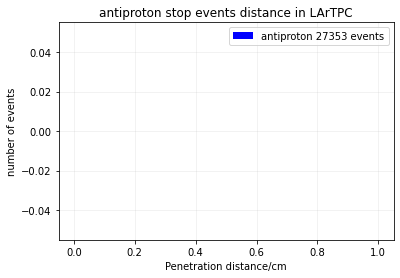

In [75]:
anti_proton_Y = np.array(PeD_pbar)
plt.hist(anti_proton_Y, bins = 40, label = "antiproton 27353 events", color = 'b')

plt.title('antiproton stop events distance in LArTPC')
plt.xlabel('Penetration distance/cm')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

print("Number of events less than 1.3m:"+str(len(PeD_pbar[PeD_pbar<130])/len(PeD_pbar)))
print("Number of events less than 1.2m:"+str(len(PeD_pbar[PeD_pbar<120])/len(PeD_pbar)))
print("Number of events less than 1.1m:"+str(len(PeD_pbar[PeD_pbar<110])/len(PeD_pbar)))
print("Number of events less than 1.0m:"+str(len(PeD_pbar[PeD_pbar<100])/len(PeD_pbar)))
print("Number of events less than 0.9m:"+str(len(PeD_pbar[PeD_pbar<90])/len(PeD_pbar)))
print("Number of events less than 0.8m:"+str(len(PeD_pbar[PeD_pbar<80])/len(PeD_pbar)))
print("Number of events less than 0.7m:"+str(len(PeD_pbar[PeD_pbar<70])/len(PeD_pbar)))

In [ ]:
anti_proton_Y = np.array(PeD_pbar_z)
plt.hist(anti_proton_Y, bins = 40, label = "antiproton 27353 events", color = 'b')

plt.title('antiproton stop events depth in LArTPC')
plt.xlabel('Penetration Depth/cm')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

print("Number of events less than 20cm:"+str(len(PeD_pbar_z[PeD_pbar_z<20])/len(PeD_pbar_z)))
print("Number of events less than 18cm:"+str(len(PeD_pbar_z[PeD_pbar_z<18])/len(PeD_pbar_z)))
print("Number of events less than 16cm:"+str(len(PeD_pbar_z[PeD_pbar_z<16])/len(PeD_pbar_z)))
print("Number of events less than 14cm:"+str(len(PeD_pbar_z[PeD_pbar_z<14])/len(PeD_pbar_z)))
print("Number of events less than 12cm:"+str(len(PeD_pbar_z[PeD_pbar_z<12])/len(PeD_pbar_z)))
print("Number of events less than 10cm:"+str(len(PeD_pbar_z[PeD_pbar_z<10])/len(PeD_pbar_z)))
print("Number of events less than 8cm:"+str(len(PeD_pbar_z[PeD_pbar_z<8])/len(PeD_pbar_z)))

In [ ]:
anti_proton_Y = np.array(TOF_out_pbar_side[TOF_out_pbar_side>0])
plt.hist(anti_proton_Y, bins = 40, label = "antiproton %d events"%len(TOF_out_pbar_side[TOF_out_pbar_side>0]), color = 'b')

plt.title('antiproton outer TOF side hit')
plt.xlabel('side position away from top/cm')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

print("Number of events less than 1.5m:"+str(len(PeD_pbar[PeD_pbar<150])/len(PeD_pbar)))
print("Number of events less than 1.4m:"+str(len(PeD_pbar[PeD_pbar<140])/len(PeD_pbar)))
print("Number of events less than 1.3m:"+str(len(PeD_pbar[PeD_pbar<130])/len(PeD_pbar)))
print("Number of events less than 1.2m:"+str(len(PeD_pbar[PeD_pbar<120])/len(PeD_pbar)))
print("Number of events less than 1.1m:"+str(len(PeD_pbar[PeD_pbar<110])/len(PeD_pbar)))
print("Number of events less than 1.0m:"+str(len(PeD_pbar[PeD_pbar<100])/len(PeD_pbar)))
print("Number of events less than 0.9m:"+str(len(PeD_pbar[PeD_pbar<90])/len(PeD_pbar)))

In [ ]:

plt.hist(distance_pbar[TOF_out_pbar_side>0], bins = 200, label = "antiproton %d events"%len(TOF_out_pbar_side[TOF_out_pbar_side>0]), color = 'b')
plt.title('antiproton outer TOF side hit distance')
plt.xlabel('distance between outer TOF and inner TOF/cm')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

print("Number of events distance larger than 1.5m:"+str(len(distance_pbar[np.logical_and(TOF_out_pbar_side>0, distance_pbar>150)])/len(distance_pbar[TOF_out_pbar_side>0])))